In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import plotly.express as px
import molplotly

# PCA of 2D descriptor data

In [63]:
df_2D_desc = pd.read_csv (r'C:\documenten hier\2D_desc_ccr2.csv')
df_2D_desc.head()

,InChIKey,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268,...,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134,...,0,0,0,0,0,0,0,1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242,...,1,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [64]:
features = list(df_2D_desc.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

z = df_2D_desc.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc.loc[:,['InChIKey']].values


In [65]:
x = StandardScaler().fit_transform(z)

In [66]:
pd.DataFrame(data = x, columns= features).head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.586775,-0.926815,0.586775,-0.824366,-1.907122,2.850287,2.962771,2.849568,2.508794,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,4.213796,0.0,-0.120096,-0.204302,-0.307705
1,-0.476874,1.330474,-0.476874,0.326799,1.330812,-1.682707,-1.603322,-1.678381,-1.596043,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,3.249868
2,-0.051088,-0.694339,-0.051088,0.864149,0.431093,-0.076852,-0.068595,-0.073711,0.058145,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705
3,1.127661,-0.670728,1.127661,-0.604163,-0.085110,1.590767,1.531768,1.592395,1.773599,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705
4,0.442204,-0.987443,0.442204,-0.205891,-0.641400,1.862113,1.912641,1.862699,1.712333,0.0,...,-0.212606,-0.280347,3.751190,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705


In [67]:
pca = PCA(n_components=2) # set the amount of dimensions to 2

In [68]:
principalComponents = pca.fit_transform(x)


In [69]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components

In [70]:
principalDf.head()

,principal component 1,principal component 2
0,-12.587565,6.110896
1,9.388117,3.541694
2,-0.673388,1.848878
3,-11.975406,-7.319442
4,-9.195806,3.238829


In [71]:
finalDf = pd.concat([principalDf, df_2D_desc[['InChIKey']], df_2D_desc[['scaffold']], df_2D_desc[['smiles']]], axis = 1)
finalDf['scaffold'] = df_2D_desc['scaffold'].astype(str)
finalDf['smiles'] = df_2D_desc['smiles'].astype(str)
finalDf.head(5)

,principal component 1,principal component 2,InChIKey,scaffold,smiles
0,-12.587565,6.110896,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,9.388117,3.541694,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-0.673388,1.848878,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-11.975406,-7.319442,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-9.195806,3.238829,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [72]:
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[35.64843451 20.06726128]
[0.189507   0.10667752]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

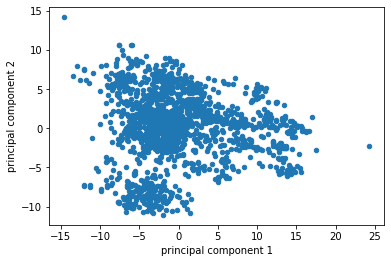

In [73]:
finalDf.plot.scatter(x= 'principal component 1', y='principal component 2')

In [74]:
series = pd.value_counts(finalDf.scaffold)
mask = (series.lt(10))
finalDf['scaffold_grouped'] = np.where(finalDf['scaffold'].isin(series[mask].index),'Other',finalDf['scaffold'])


In [75]:
# The following symbols will be used in all scatterplots
symbols = ['circle', 'square', 'diamond', 'cross', 'x',  'pentagon', 'hexagram', 'star',
           'diamond', 'hourglass', 'bowtie']

In [76]:
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
df.head()
finalDf['Activity'] = df['pchembl_value_Mean']
finalDf['Activity'] = finalDf['Activity']

In [77]:
fig_2D = px.scatter(finalDf, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                   color_discrete_map= {'Other': 'lightgrey', 
                                    
                                        },
                
                    title = 'PCA on 2D descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_2D.update_layout(plot_bgcolor='White')
#fig_2D.show()
app_scatter = molplotly.add_molecules(fig=fig_2D,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9001, height=800)


---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

In [82]:

fig_2D_2 = px.scatter(finalDf, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=[(0,"red"),  (0.5,"yellow"),(1, "green")],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                     #symbol='scaffold_grouped',
                    #symbol_sequence = symbols,
                     )
fig_2D_2.update_layout(plot_bgcolor='White')
#fig_2D_2.show()
app_scatter = molplotly.add_molecules(fig=fig_2D_2,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9002, height=800)

# PCA on morgan fingerprint data

In [19]:
df_morgan = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr2_1024.csv')
df_morgan.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,scaffold
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...


In [20]:
df_morgan.dtypes

InChIKey    object
0            int64
1            int64
2            int64
3            int64
             ...  
1020         int64
1021         int64
1022         int64
1023         int64
scaffold    object
Length: 1026, dtype: object

In [21]:
type(df_morgan['InChIKey'])

pandas.core.series.Series

In [22]:
featuresM = list(df_morgan.columns.values)
featuresM.remove('InChIKey')
featuresM.remove ('scaffold')
a = df_morgan.loc[ :,featuresM].values # stores all values as numpy.ndarray
b = df_morgan.loc[:,['InChIKey']].values


In [23]:
c = StandardScaler().fit_transform(a)

In [24]:
pd.DataFrame(data = c, columns= featuresM).head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.241469,1.189487,2.332970,-0.405139,-0.608383,-0.549972,-0.206443,-0.368694,-0.315712,-0.317976,...,4.141321,-0.157778,-0.198517,-0.335742,-0.174714,0.534421,-0.193629,-0.206443,-0.348704,-0.244205
1,-0.241469,-0.840699,-0.428638,-0.405139,-0.608383,-0.549972,-0.206443,-0.368694,3.167441,-0.317976,...,-0.241469,-0.157778,-0.198517,-0.335742,5.723635,-1.871185,-0.193629,-0.206443,-0.348704,-0.244205
2,-0.241469,-0.840699,-0.428638,2.468286,-0.608383,1.818275,-0.206443,-0.368694,-0.315712,-0.317976,...,-0.241469,-0.157778,-0.198517,2.978480,-0.174714,0.534421,-0.193629,-0.206443,-0.348704,-0.244205
3,4.141321,-0.840699,-0.428638,-0.405139,-0.608383,-0.549972,-0.206443,-0.368694,-0.315712,-0.317976,...,-0.241469,-0.157778,-0.198517,-0.335742,-0.174714,0.534421,-0.193629,-0.206443,-0.348704,-0.244205
4,-0.241469,1.189487,2.332970,-0.405139,-0.608383,1.818275,-0.206443,-0.368694,-0.315712,-0.317976,...,-0.241469,6.338038,-0.198517,-0.335742,-0.174714,0.534421,-0.193629,-0.206443,2.867759,-0.244205


In [25]:
pca_M = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_M = pca_M.fit_transform(c)

In [26]:
principalDf_M = pd.DataFrame(data = principalComponents_M
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_M.head()

,principal component 1,principal component 2
0,1.385028,1.584220
1,-1.336759,0.530998
2,-6.905686,-2.170731
3,13.255111,-13.648863
4,-0.192930,-0.515434


In [27]:
print(pca_M.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_M.explained_variance_ratio_) # total variance explained by first and second principal component

[33.65764926 32.60420372]
[0.03284933 0.03182118]


In [28]:
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
df.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AAMCCXZHVCUGJS_on_P41597_WT,High,ChEMBL30,CHEMBL231340,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,AAMCCXZHVCUGJS,AAMCCXZHVCUGJS-UHFFFAOYSA-N,InChI=1S/C37H35F6N5O2S/c1-23-21-48(15-12-35(23...,"""AuxInfo=1/1/N:1,50,49,36,37,51,35,48,45,6,44,...",P41597_WT,...,0,NaN,=,7.890,7.89,0.00,0.00,1.0,7.89,0.00
1,AANWVQVQZDEWDD_on_P41597_WT,Low,ChEMBL30,CHEMBL1688881,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,AANWVQVQZDEWDD,AANWVQVQZDEWDD-UHFFFAOYSA-N,InChI=1S/C21H16N2O4/c24-20(16-9-10-18-19(12-16...,"""AuxInfo=1/1/N:22,21,23,26,20,24,25,27,11,10,1...",P41597_WT,...,0,NaN,<,5.000,5.00,0.00,0.00,1.0,5.00,0.00
2,AAZMPANXGYITPF_on_P41597_WT,High,ChEMBL30,CHEMBL1290522,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,AAZMPANXGYITPF,AAZMPANXGYITPF-UHFFFAOYSA-N,"InChI=1S/C25H29F3N4O3/c26-25(27,28)18-6-4-5-17...","""AuxInfo=1/1/N:28,27,29,9,8,10,26,30,22,32,23,...",P41597_WT,...,0,NaN,=,6.190,6.19,0.00,0.00,1.0,6.19,0.00
3,ABHVKYFWPPHTHF_on_P41597_WT,High,ChEMBL30,CHEMBL3115111,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,ABHVKYFWPPHTHF,ABHVKYFWPPHTHF-UHFFFAOYSA-N,InChI=1S/C30H42F3N5O6/c1-41-26-18-43-8-3-25(26...,"""AuxInfo=1/0/N:1,32,7,31,21,25,19,6,22,24,18,3...",P41597_WT,...,0,NaN,=,7.010; 7.390,7.20,0.19,0.19,2.0,7.20,0.19
4,ABOSMIZKCHEJEN_on_P41597_WT,High,ChEMBL30,CHEMBL1092748,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,ABOSMIZKCHEJEN,ABOSMIZKCHEJEN-UHFFFAOYSA-N,InChI=1S/C30H35F6N3O4S/c1-18(2)38(3)23-9-10-26...,"""AuxInfo=1/1/N:1,3,5,41,40,42,39,43,7,8,12,11,...",P41597_WT,...,0,NaN,=,8.460,8.46,0.00,0.00,1.0,8.46,0.00


### below is the code and depicition of scaled morgan fingerprint data, scaling binaire data does not really seem to make sense. 


In [29]:
finalDf_M = pd.concat([principalDf_M, df_morgan[['InChIKey']],df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M['scaffold'] = finalDf_M['scaffold'].astype(str)
#finalDf_M['SMILES'] = finalDf_M['SMILES'].astype(str)
finalDf_M.head(5)


,principal component 1,principal component 2,InChIKey,scaffold,SMILES
0,1.385028,1.584220,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-1.336759,0.530998,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-6.905686,-2.170731,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,13.255111,-13.648863,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-0.192930,-0.515434,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

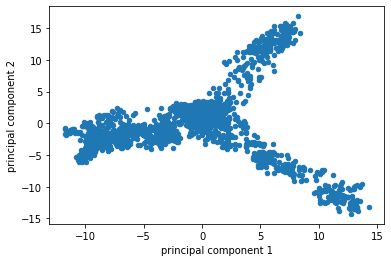

In [30]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [31]:
series = pd.value_counts(finalDf_M.scaffold)
mask = (series.lt(10))
finalDf_M['scaffold_grouped'] = np.where(finalDf_M['scaffold'].isin(series[mask].index),'Other',finalDf_M['scaffold'])
#df2.head()

In [32]:
fig_m = px.scatter(finalDf_M, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped", symbol='scaffold_grouped',
                   symbol_sequence = symbols,
                   hover_data = ['InChIKey'],
                     color_discrete_map= {'Other': 'lightgrey'
                                         },
                   title = 'PCA on morgan fingerprints after scaling',
                   width=1200, height=800, render_mode='SVG'
                   )

app_scatter = molplotly.add_molecules(fig=fig_m,
                                      df=finalDf_M,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped'
                                      )
app_scatter.run_server(mode='inline', port=9003, height=800)

In [33]:
finalDf_M['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_m_2 = px.scatter(finalDf_M, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                     color_discrete_map= {'Other': 'grey'
                                         },
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,render_mode='SVG',
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'PCA on morgan fingerprint data after scaling',
                                      width=1000,
                                      height=800)
#fig_m_2.show()
app_scatter = molplotly.add_molecules(fig=fig_m_2,
                                      df=finalDf_M,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped'
                                      )
app_scatter.run_server(mode='inline', port=9004, height=800)

### PCA on data with morgan fingerprint without transforming

In [34]:
pd.DataFrame(data = a, columns= featuresM).head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [35]:
pca_M2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_M2 = pca_M2.fit_transform(a)

In [36]:
principalDf_M2 = pd.DataFrame(data = principalComponents_M2
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_M2.head()

,principal component 1,principal component 2
0,-0.743705,-0.300753
1,0.239874,-0.774440
2,3.733653,0.052257
3,-2.222238,5.926215
4,-0.136697,0.041622


In [37]:
print(pca_M2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_M2.explained_variance_ratio_) # total variance explained by first and second principal component

[4.94431163 4.07052156]
[0.06123209 0.05041077]


In [38]:
finalDf_M2 = pd.concat([principalDf_M2, df_morgan[['InChIKey']], df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M2['scaffold'] = finalDf_M2['scaffold'].astype(str)
finalDf_M2.head(5)

,principal component 1,principal component 2,InChIKey,scaffold,SMILES
0,-0.743705,-0.300753,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,0.239874,-0.774440,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,3.733653,0.052257,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-2.222238,5.926215,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-0.136697,0.041622,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [39]:
series = pd.value_counts(finalDf_M2.scaffold)
mask = (series.lt(10))
finalDf_M2['scaffold_grouped'] = np.where(finalDf_M2['scaffold'].isin(series[mask].index),'Other',finalDf_M2['scaffold'])
#finalDf_M2.head()

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

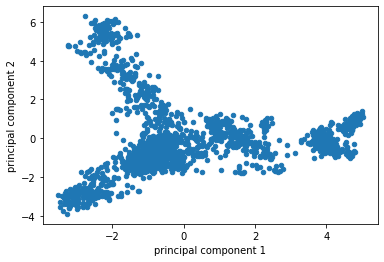

In [40]:
finalDf_M2.plot.scatter(x= 'principal component 1', y='principal component 2')

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

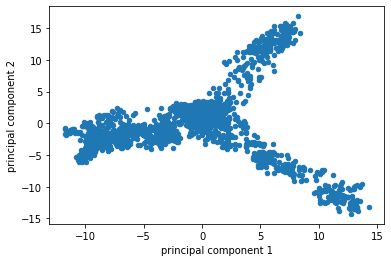

In [41]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [42]:
pd.isna(finalDf_M2["scaffold"])

0       False
1       False
2       False
3       False
4       False
        ...  
1683    False
1684    False
1685    False
1686    False
1687    False
Name: scaffold, Length: 1688, dtype: bool

In [14]:
fig_M2 = px.scatter(finalDf_M2, x="principal component 1", y="principal component 2", 
                 color = "scaffold_grouped", symbol='scaffold_grouped',
                 symbol_sequence = symbols,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },render_mode='SVG',
                 title = 'PCA on morgan fingerprint without scaling',width=1200,
                         height=800)


       
fig_M2.update_layout(plot_bgcolor='White')
app_scatter = molplotly.add_molecules(fig=fig_M2,
                                      df=finalDf_M2,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')

                                                                          
app_scatter.run_server(mode='inline', port=9005, height=800)

NameError: name 'finalDf_M2' is not defined

In [44]:
finalDf_M2['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_M2_2 = px.scatter(finalDf_M2, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                    color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on morgan fingerprint data without scaling',
                                      width=1000,
                                      height=800)
fig_M2_2.update_layout(plot_bgcolor='White')
#fig_M2_2.show()
app_scatter = molplotly.add_molecules(fig=fig_M2_2,
                                      df=finalDf_M2,
                                      smiles_col='SMILES',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')

                                                                          
app_scatter.run_server(mode='inline', port=9006, height=800)

# PCA on pharmacophore fingerprint data





### PCA on pharmacophore fingerprint data with scaling

In [45]:
df_PharmFp = pd.read_csv (r'C:\documenten hier\PharmacoFp_ccr2.csv')
df_PharmFp.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,39964,39965,39966,39967,39968,39969,39970,39971,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [46]:
featuresPh = list(df_PharmFp.columns.values)
featuresPh.remove('InChIKey')
featuresPh.remove ('scaffold')
featuresPh.remove('smiles')
e = df_PharmFp.loc[ :,featuresPh].values # stores all values as numpy.ndarray
f = df_PharmFp.loc[:,['InChIKey']].values


In [47]:
g = StandardScaler().fit_transform(e)

In [48]:
pd.DataFrame(data = g, columns= featuresPh).head()

,0,1,2,3,4,5,6,7,8,9,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971
0,0.0,-0.024347,0.0,0.0,0.0,-0.024347,-0.024347,-0.217132,-0.230273,-0.227406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.024347,0.0,0.0,0.0,-0.024347,-0.024347,-0.217132,-0.230273,-0.227406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.024347,0.0,0.0,0.0,-0.024347,-0.024347,-0.217132,-0.230273,-0.227406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.024347,0.0,0.0,0.0,-0.024347,-0.024347,-0.217132,-0.230273,-0.227406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.024347,0.0,0.0,0.0,-0.024347,-0.024347,-0.217132,-0.230273,-0.227406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
pca_Ph = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_Ph = pca_Ph.fit_transform(g)

In [50]:
principalDf_Ph = pd.DataFrame(data = principalComponents_Ph
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_Ph.head()

,principal component 1,principal component 2
0,-19.130279,-11.440866
1,-21.483462,-19.099254
2,-3.566184,17.903889
3,61.066328,-7.983929
4,0.416984,5.630609


In [51]:
print(pca_Ph.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_Ph.explained_variance_ratio_) # total variance explained by first and second principal component

[601.07109529 419.01877114]
[0.05747369 0.04006607]


In [52]:
finalDf_Ph = pd.concat([principalDf_Ph, df_PharmFp[['InChIKey']],df_PharmFp[['scaffold']], df_PharmFp[['smiles']]], axis = 1)
finalDf_Ph['scaffold'] = finalDf_Ph['scaffold'].astype(str)
finalDf_Ph.head(5)


,principal component 1,principal component 2,InChIKey,scaffold,smiles
0,-19.130279,-11.440866,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-21.483462,-19.099254,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-3.566184,17.903889,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,61.066328,-7.983929,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,0.416984,5.630609,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [53]:
series = pd.value_counts(finalDf_Ph.scaffold)
mask = (series.lt(10))
finalDf_Ph['scaffold_grouped'] = np.where(finalDf_Ph['scaffold'].isin(series[mask].index),'Other',finalDf_Ph['scaffold'])
#df2.head()

In [54]:
fig_Ph = px.scatter(finalDf_Ph, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped", symbol='scaffold_grouped',
                   symbol_sequence = symbols,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   title = 'PCA on Pharmacophore fingerprints after scaling',
                   width=1200,
                   height=800,render_mode='SVG')

#fig_Ph.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph,
                                      df=finalDf_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9007, height=1000)


In [55]:
finalDf_Ph['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_Ph_2 = px.scatter(finalDf_Ph, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                      
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    render_mode='SVG',
                    title = 'PCA on pharmacophore fingerprint data after scaling',
                                      width=1000,
                                      height=800)
#fig_Ph_2.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph_2,
                                      df=finalDf_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9008, height=800)


### PCA on pharmacophore fingerprint data without scaling

In [56]:
pca_Ph2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_Ph2 = pca_Ph2.fit_transform(e)

In [57]:
principalDf_Ph2 = pd.DataFrame(data = principalComponents_Ph2
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_Ph2.head()

,principal component 1,principal component 2
0,-7.936690,-2.215926
1,-11.665186,-5.230268
2,2.724395,9.735131
3,19.841122,-9.095782
4,3.266950,3.857497


In [58]:
print(pca_Ph2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_Ph2.explained_variance_ratio_) # total variance explained by first and second principal component

[77.35350332 55.02802077]
[0.13420523 0.09547141]


In [59]:
finalDf_Ph2 = pd.concat([principalDf_Ph2, df_PharmFp[['InChIKey']], df_PharmFp[['scaffold']], df_PharmFp[['smiles']]], axis = 1)
finalDf_Ph2['scaffold'] = finalDf_Ph2['scaffold'].astype(str)
finalDf_Ph2.head(5)

,principal component 1,principal component 2,InChIKey,scaffold,smiles
0,-7.936690,-2.215926,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-11.665186,-5.230268,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,2.724395,9.735131,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,19.841122,-9.095782,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,3.266950,3.857497,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [60]:
series = pd.value_counts(finalDf_Ph2.scaffold)
mask = (series.lt(10))
finalDf_Ph2['scaffold_grouped'] = np.where(finalDf_Ph2['scaffold'].isin(series[mask].index),'Other',finalDf_Ph2['scaffold'])


In [63]:
fig_Ph2 = px.scatter(finalDf_Ph2, x="principal component 1", y="principal component 2", 
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                   symbol_sequence = symbols,  
                   title = 'PCA on Pharmacophore fingerprints without scaling',
                      color_discrete_map= {'Other': 'lightgrey'
                                         },
                   width=1200,
                   height=800,render_mode='SVG')
fig_Ph2.update_layout(plot_bgcolor='White')
app_scatter = molplotly.add_molecules(fig=fig_Ph2,
                                      df=finalDf_Ph2,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9009, height=800)

In [64]:
finalDf_Ph2['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_Ph2_2 = px.scatter(finalDf_Ph2, x="principal component 1", y="principal component 2",
                    color = "pchembl_value_Mean",
                       color_discrete_map= {'Other': 'grey'
                                         },
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'pchembl_value_Mean': 'Activity'},
                    
                    title = 'PCA on pharmacophore fingerprint data without scaling',render_mode='SVG',
                                      width=1000,
                                      height=800, )
fig_Ph2_2.update_layout(plot_bgcolor='White')
#fig_Ph2_2.show()
app_scatter = molplotly.add_molecules(fig=fig_Ph2_2,
                                      df=finalDf_Ph2,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9010, height=800)

## PCA on learned descriptor data


In [31]:
df_learned = pd.read_csv (r'C:\documenten hier\smiles_1482_ccr2_2.csv')
df_learned.head()

,smiles,new_smiles,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,...,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512,Activity,InChIKey
0,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,0.451738,0.574400,0.112859,0.058107,-0.211912,-0.684652,-0.605549,0.346793,...,-0.125112,-0.039612,-0.993693,0.284359,-0.163784,-0.391925,-0.373108,0.276012,5.000,AANWVQVQZDEWDD-UHFFFAOYSA-N
1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,-0.902936,0.338289,-0.089829,0.297057,0.165143,0.034665,-0.220617,-0.107172,...,-0.221622,-0.095471,-0.999081,-0.202076,-0.170638,-0.239126,0.386398,0.612926,6.190,AAZMPANXGYITPF-UHFFFAOYSA-N
2,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,-0.852346,0.490854,-0.074181,0.496300,0.526191,-0.478252,0.071138,-0.295008,...,-0.406049,-0.199758,-0.996681,0.279550,-0.344650,-0.336218,0.367996,0.414955,6.398,ABSDATGZYRKKAQ-UHFFFAOYSA-N
3,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,-0.907761,-0.389732,-0.421162,-0.542837,-0.042211,-0.503789,0.198389,-0.039144,...,-0.760867,0.620664,-0.999571,0.647168,-0.537615,0.634854,0.615865,0.242375,7.195,ABWDLWYDMCTIDD-UHFFFAOYSA-N
4,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,-0.873453,0.252932,0.112824,0.263079,-0.000688,-0.383503,-0.003180,-0.123824,...,0.065709,-0.773202,-0.999751,-0.112950,-0.571104,0.127560,0.304943,-0.393014,8.165,ACFBGSHYQKWEDV-UHFFFAOYSA-N


In [32]:
data_learned = df_learned.drop(['InChIKey', 'smiles', 'new_smiles', 'Activity'], axis=1)
data_learned.head()

,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,cddd_9,cddd_10,...,cddd_503,cddd_504,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512
0,0.451738,0.574400,0.112859,0.058107,-0.211912,-0.684652,-0.605549,0.346793,0.186300,-0.054652,...,-0.200742,-0.442978,-0.125112,-0.039612,-0.993693,0.284359,-0.163784,-0.391925,-0.373108,0.276012
1,-0.902936,0.338289,-0.089829,0.297057,0.165143,0.034665,-0.220617,-0.107172,-0.139591,-0.080506,...,-0.463660,-0.603165,-0.221622,-0.095471,-0.999081,-0.202076,-0.170638,-0.239126,0.386398,0.612926
2,-0.852346,0.490854,-0.074181,0.496300,0.526191,-0.478252,0.071138,-0.295008,0.418911,-0.321729,...,-0.395183,-0.799093,-0.406049,-0.199758,-0.996681,0.279550,-0.344650,-0.336218,0.367996,0.414955
3,-0.907761,-0.389732,-0.421162,-0.542837,-0.042211,-0.503789,0.198389,-0.039144,-0.327959,-0.539845,...,-0.496701,0.047690,-0.760867,0.620664,-0.999571,0.647168,-0.537615,0.634854,0.615865,0.242375
4,-0.873453,0.252932,0.112824,0.263079,-0.000688,-0.383503,-0.003180,-0.123824,0.042089,-0.210269,...,-0.040036,0.249029,0.065709,-0.773202,-0.999751,-0.112950,-0.571104,0.127560,0.304943,-0.393014


In [33]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_learned_scaled = scaler.fit_transform(data_learned)

In [34]:
pca = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_learned = pca.fit_transform(data_learned_scaled)

In [35]:
principalDf_learned = pd.DataFrame(data = principalComponents_learned
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_learned.head()

,principal component 1,principal component 2
0,8.948826,1.154526
1,-2.559599,-7.284772
2,1.458916,-3.906134
3,-12.044090,10.286693
4,-0.781811,-7.534714


In [36]:
finalDf_learned = pd.concat([principalDf_learned, df_learned[['InChIKey']], df_learned[['new_smiles']], df_learned[['smiles']], df_learned[['Activity']]], axis = 1)
finalDf_learned['new_smiles'] = df_learned['new_smiles'].astype(str)
finalDf_learned['smiles'] = df_learned['smiles'].astype(str)
finalDf_learned.head(5)

,principal component 1,principal component 2,InChIKey,new_smiles,smiles,Activity
0,8.948826,1.154526,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.000
1,-2.559599,-7.284772,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.190
2,1.458916,-3.906134,ABSDATGZYRKKAQ-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,6.398
3,-12.044090,10.286693,ABWDLWYDMCTIDD-UHFFFAOYSA-N,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,7.195
4,-0.781811,-7.534714,ACFBGSHYQKWEDV-UHFFFAOYSA-N,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,8.165


In [37]:
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[48.61004078 40.69185884]
[0.09487742 0.07942266]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

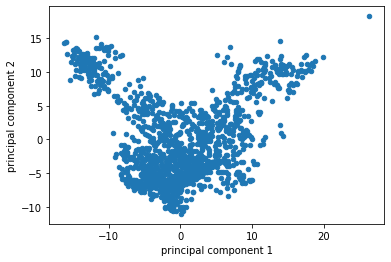

In [38]:
finalDf_learned.plot.scatter(x= 'principal component 1', y='principal component 2')

In [39]:
finalDf_learned["mol"] = finalDf_learned.apply(lambda row: Chem.MolFromSmiles(row['new_smiles']), axis=1)
finalDf_learned["scaffold"] = finalDf_learned.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_learned['scaffold'] = finalDf_learned['scaffold'].astype(str)
finalDf_learned.head()

,principal component 1,principal component 2,InChIKey,new_smiles,smiles,Activity,mol,scaffold
0,8.948826,1.154526,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.000,<rdkit.Chem.rdchem.Mol object at 0x0000022E0A7...,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
1,-2.559599,-7.284772,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.190,<rdkit.Chem.rdchem.Mol object at 0x0000022E0A7...,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
2,1.458916,-3.906134,ABSDATGZYRKKAQ-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,6.398,<rdkit.Chem.rdchem.Mol object at 0x0000022E0A7...,O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1
3,-12.044090,10.286693,ABWDLWYDMCTIDD-UHFFFAOYSA-N,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,7.195,<rdkit.Chem.rdchem.Mol object at 0x0000022E0A7...,O=C(N1CC2CC1CN2c1ccccc1)C12CCCC1CC(NC1CCOCC1)C2
4,-0.781811,-7.534714,ACFBGSHYQKWEDV-UHFFFAOYSA-N,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,8.165,<rdkit.Chem.rdchem.Mol object at 0x0000022E0A7...,O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1


In [40]:
# This following code was created to make sure the same groups of scaffolds are formed as in previous depictions, due to the loss of data. 
namelist = finalDf['scaffold_grouped'].tolist()
namelist_unique = np.unique(namelist)

namelist2 = finalDf_learned['scaffold'].tolist()
for i in range(len(namelist2)):
    if namelist2[i] not in namelist_unique:
        namelist2[i] = 'Other'
finalDf_learned['scaffold_grouped'] = namelist2
print(namelist_unique)    

['C1=CC(c2ccccc2)CCC1' 'O=C(C1CCC(NC2CCOCC2)C1)N1CC2CC1CN2'
 'O=C(C1CCC(NC2CCOCC2)C1)N1CCN(c2ccccn2)CC1'
 'O=C(C1CCC(NC2CCc3ccccc32)C1)N1CCc2ccccc2C1'
 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1'
 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3ccccc3)CC2)CC1'
 'O=C(C=Cc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1'
 'O=C(C=Cc1ccccc1)NCCCCCN1CCC(c2c[nH]c3ccccc23)CC1'
 'O=C(CC(=O)Nc1ccccc1)NCCNCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1CS(=O)(=O)c1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NC(=O)c1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCC2CCN(C(=O)c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCN2CCN(C(=O)c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3cccnc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CNCCC1NCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1'
 'O=C(CNc1n[nH]c2ccccc12)NC1CN(C2CCCCC2)C1'
 'O=C(Cc1nc2ccccc2[nH]1)NC1CCCCC1CS(=O)(=O)c1ccccc1'
 'O=C(N1CC2CC1C

In [42]:
fig_learned = px.scatter(finalDf_learned, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                         
                   category_orders={"scaffold_grouped": ['Other', 'O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1', 'O=C(N1CC2CC1CN2c1ccccc1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1CS(=O)(=O)c1ccccc1', 
'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1'
, 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCC2CCN(C(=O)c3ccccc3)CC2)C1', 'O=C(CNc1n[nH]c2ccccc12)NC1CN(C2CCCCC2)C1', 'O=C(Nc1ccc(C[NH2+]C2CCOCC2)cc1)c1ccccc1', 'O=S(=O)(Nc1ccccc1Oc1ccccc1)c1ccccc1', 'O=C(NCc1ccccc1)C1CCC(N2CCC3(C=Cc4ccccc43)CC2)C1', 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3ccccc3)CC2)CC1', 'O=C(C1CCC(NC2CCc3ccccc32)C1)N1CCc2ccccc2C1', 'O=C(Cc1nc2ccccc2[nH]1)NC1CCCCC1CS(=O)(=O)c1ccccc1', 'O=C(N1CCc2ncccc2C1)C12CNCC1CC(NC1CCOCC1)C2','C1=CC(c2ccccc2)CCC1' , 'c1ccc(Cn2ccc3ccccc32)cc1', 'O=C(C=Cc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'c1ccc(CN2CCCN(CCC(c3ccccc3)c3ccccc3)CC2)cc1', 'O=C1c2ccnc(Nc3ccccc3)c2CCCN1CCCN1CCCCC1', 'O=C(NCc1ccccc1)C1CCC(NC2CCOCC2)C1', 'O=C(Nc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'O=C(C1CCC(NC2CCOCC2)C1)N1CC2CC1CN2', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3cccnc3)CC2)C1', 'O=C(NC1CCN(C2CCCCC2)C1=O)c1ccccc1', 'O=S(=O)(Nc1ccccc1Cn1ccnn1)c1ccccc1', 'O=C(C1CCC(NC2CCOCC2)C1)N1CCN(c2ccccn2)CC1', 'O=C(N1CC2CC1CN2c1ccccn1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(C=Cc1ccccc1)NCCCCCN1CCC(c2c[nH]c3ccccc23)CC1', 'O=C(Nc1ccccc1)N1CCN(CC2CCCN(C3CC3)C2)CC1', 'O=C(Nc1nccs1)N1CCN(C(=O)C2CNCCN2)CC1', 'c1ccc(CN2CCCC(Nc3ccc4[nH]ncc4c3)C2)cc1', 'O=C(N1CCc2ncccc2C1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(CC(=O)Nc1ccccc1)NCCNCc1ccccc1', 'c1ccc(-c2ccn(-c3ccc4ccccc4c3)n2)cc1', 'O=C(Nc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3ccccc3)CC2)C1', 'O=C(NCc1ccccc1)C(CCN1CCC(c2ccccc2)CC1)c1cscn1', 
'O=C(CNC(=O)c1ccccc1)NC1CNCCC1NCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCN2CCN(C(=O)c3ccccc3)CC2)C1', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NC(=O)c1ccccc1']
},      
                         
                         
                    title = 'PCA on learned descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_learned.update_layout(plot_bgcolor='White')
#fig_learned.show()
app_scatter = molplotly.add_molecules(fig=fig_learned,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9011, height=800)


In [108]:
fig_learned_2 = px.scatter(finalDf_learned, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    
                    title = 'PCA on learned descriptor data after scaling',
                                      width=1000,
                                      height=800,
                          render_mode='SVG',
                           #symbol='scaffold_grouped',
                    symbol_sequence = symbols)
fig_learned_2.update_layout(plot_bgcolor='White')
#fig_learned_2.show()
app_scatter = molplotly.add_molecules(fig=fig_learned_2,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9012, height=800)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

## PCA on mordred 3D descriptor

In [46]:
df_3D_desc = pd.read_csv (r'C:\documenten hier\ccr2_3D_descriptor_nieuw.csv')
df_3D_desc.head()

,Mor18se,Mor28se,FNSA4,Mor25m,Mor17m,Mor02v,Mor04p,DPSA2,Mor16se,Mor26se,...,MOMI-Y,Mor22,Mor13m,Mor24,Mor03v,MOMI-X,WNSA2,WPSA3,Mor16p,InChIKey
0,-3.846858,-0.000508,-0.022568,0.586588,0.154729,35.832541,-0.498818,3878.150668,0.772816,1.034186,...,15634.491431,-0.061756,-2.378593,-0.280175,-6.525571,21499.363404,-1882.624132,28.060446,0.318595,AAMCCXZHVCUGJS-UHFFFAOYSA-N
1,-1.898603,-0.262921,-0.028921,0.732314,0.258629,25.986769,0.473817,1584.679360,0.995879,-0.507806,...,8399.695951,0.052875,-1.367359,0.061660,-2.505227,9300.751623,-468.893931,19.081605,0.468295,AANWVQVQZDEWDD-UHFFFAOYSA-N
2,-2.989493,0.164578,-0.022624,0.687596,0.243695,32.643467,0.929407,2533.289724,0.402458,0.437096,...,16586.730470,0.531088,-1.805617,-0.020541,-4.899884,17223.356558,-861.006891,20.624577,-0.322697,AAZMPANXGYITPF-UHFFFAOYSA-N
3,-3.073396,-1.264999,-0.014509,-0.124778,-0.770064,39.280681,3.053908,3849.039048,-1.119070,0.502982,...,13676.562806,0.065463,-2.599045,0.170875,-7.091594,21266.883828,-1044.824777,33.028368,-0.946238,ABHVKYFWPPHTHF-UHFFFAOYSA-N
4,-2.912707,-0.388872,-0.023754,0.461109,-0.436073,31.990485,1.362089,3215.173402,0.876197,0.367882,...,18539.885421,0.116041,-2.168650,-0.225128,-6.053014,20934.304640,-1522.706173,18.640388,-0.377981,ABOSMIZKCHEJEN-UHFFFAOYSA-N


In [47]:

data_3D = df_3D_desc.drop(['InChIKey'], axis=1)

data_3D_scaled = StandardScaler().fit_transform(data_3D)


In [48]:
pca = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_3D = pca.fit_transform(data_3D_scaled)
print(pca.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca.explained_variance_ratio_) # total variance explained by first and second principal component

[61.16778327 35.60324078]
[0.28700257 0.16705234]


In [49]:
pca_2 = PCA(n_components=2) # set the amount of dimensions to 2
principalComponents_3D_without = pca_2.fit_transform(data_3D)
print(pca_2.explained_variance_) # should be the eigenvalues of the principal components(eigen vectors)
print(pca_2.explained_variance_ratio_) # total variance explained by first and second principal component

[88535150.68379775  7627502.1495703 ]
[0.90240706 0.0777444 ]


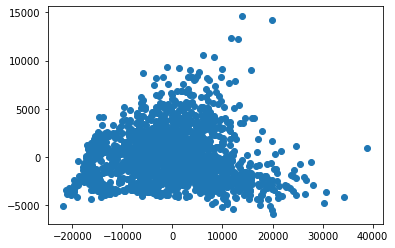

In [50]:
plt.scatter(principalComponents_3D_without[:,0], principalComponents_3D_without[:,1]) #first plot of data without scaling


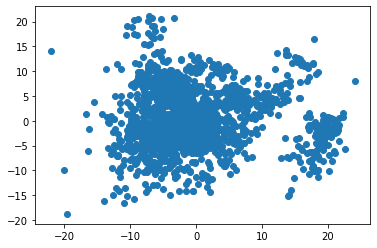

In [51]:
plt.scatter(principalComponents_3D[:,0], principalComponents_3D[:,1]) #first plot of data after scaling

In [52]:
principalDf_3D_scaled = pd.DataFrame(data = principalComponents_3D
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_3D_scaled.head()

,principal component 1,principal component 2
0,-12.209875,-13.620914
1,13.803224,-7.361940
2,-0.808555,-3.648681
3,-14.273442,1.309195
4,-7.850760,-6.235594


In [53]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
finalDf_3D_scaled = pd.concat([principalDf_3D_scaled, df_ccr2[['InChIKey']]], axis = 1)
finalDf_3D_scaled['smiles'] = df_ccr2['SMILES']
finalDf_3D_scaled['smiles'] = finalDf_3D_scaled['smiles'].astype(str)
finalDf_3D_scaled['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D_scaled.head(5)

,principal component 1,principal component 2,InChIKey,smiles,Activity
0,-12.209875,-13.620914,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89
1,13.803224,-7.361940,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00
2,-0.808555,-3.648681,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19
3,-14.273442,1.309195,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20
4,-7.850760,-6.235594,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46


In [54]:
finalDf_3D_scaled["mol"] = finalDf_3D_scaled.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D_scaled["scaffold"] = finalDf_3D_scaled.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D_scaled['scaffold'] = finalDf_3D_scaled['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D_scaled.scaffold)
mask = (series.lt(10))
finalDf_3D_scaled['scaffold_grouped'] = np.where(finalDf_3D_scaled['scaffold'].isin(series[mask].index),'Other',finalDf_3D_scaled['scaffold'])

finalDf_3D_scaled.head()

,principal component 1,principal component 2,InChIKey,smiles,Activity,mol,scaffold,scaffold_grouped
0,-12.209875,-13.620914,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89,<rdkit.Chem.rdchem.Mol object at 0x0000022E037...,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,Other
1,13.803224,-7.361940,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00,<rdkit.Chem.rdchem.Mol object at 0x0000022E037...,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,Other
2,-0.808555,-3.648681,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19,<rdkit.Chem.rdchem.Mol object at 0x0000022E037...,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,Other
3,-14.273442,1.309195,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20,<rdkit.Chem.rdchem.Mol object at 0x0000022E037...,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,Other
4,-7.850760,-6.235594,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46,<rdkit.Chem.rdchem.Mol object at 0x0000022E037...,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,Other


In [61]:
fig_3D = px.scatter(finalDf_3D_scaled, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
        
                   # size = "Activity",
                    title = 'PCA on 3D descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_3D.update_layout(plot_bgcolor='White')
#fig_3D.show()
app_scatter = molplotly.add_molecules(fig=fig_3D,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9013, height=800)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

In [56]:
fig_3D_2 = px.scatter(finalDf_3D_scaled, x="principal component 1", y="principal component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                    labels={'principal component 1': 'principal component 1',
                            'principal component 2': 'principal component 2',
                            'Activity': 'Activity'},
                    
                    title = 'PCA on 3D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                          render_mode='SVG',
                           #symbol='scaffold_grouped',
                    symbol_sequence = symbols)
fig_3D_2.update_layout(plot_bgcolor='White')
#fig_3D_2.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_2,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9014, height=800)

### 3D descriptor without scaling

In [57]:
principalDf_3D = pd.DataFrame(data = principalComponents_3D_without
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components
principalDf_3D.head()

,principal component 1,principal component 2
0,6084.373533,10633.162713
1,-10189.859308,-2583.610920
2,1772.778662,-926.560970
3,3937.098108,8342.389001
4,6920.654411,4905.397963


In [58]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
finalDf_3D = pd.concat([principalDf_3D, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D['smiles'] = df_ccr2['SMILES']
finalDf_3D['smiles'] = finalDf_3D['smiles'].astype(str)
finalDf_3D['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D.head(5)

,principal component 1,principal component 2,InChIKey,smiles,Activity
0,6084.373533,10633.162713,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89
1,-10189.859308,-2583.610920,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00
2,1772.778662,-926.560970,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19
3,3937.098108,8342.389001,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20
4,6920.654411,4905.397963,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46


In [59]:
finalDf_3D["mol"] = finalDf_3D.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D["scaffold"] = finalDf_3D.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D['scaffold'] = finalDf_3D['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D.scaffold)
mask = (series.lt(10))
finalDf_3D['scaffold_grouped'] = np.where(finalDf_3D['scaffold'].isin(series[mask].index),'Other',finalDf_3D['scaffold'])

finalDf_3D.head()

,principal component 1,principal component 2,InChIKey,smiles,Activity,mol,scaffold,scaffold_grouped
0,6084.373533,10633.162713,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89,<rdkit.Chem.rdchem.Mol object at 0x0000022E031...,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,Other
1,-10189.859308,-2583.610920,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00,<rdkit.Chem.rdchem.Mol object at 0x0000022E031...,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,Other
2,1772.778662,-926.560970,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19,<rdkit.Chem.rdchem.Mol object at 0x0000022E031...,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,Other
3,3937.098108,8342.389001,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20,<rdkit.Chem.rdchem.Mol object at 0x0000022E031...,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,Other
4,6920.654411,4905.397963,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46,<rdkit.Chem.rdchem.Mol object at 0x0000022E031...,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,Other


In [60]:
fig_3D_without = px.scatter(finalDf_3D, x="principal component 1", y="principal component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'PCA on 3D descriptor data without scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_3D_without.show()
#app_scatter = molplotly.add_molecules(fig=fig_2D,
 #                                     df=finalDf,
  #                                    smiles_col='smiles',
   #                                   title_col='InChIKey',
    #                                  condition_col = 'scaffold_grouped')
     #                                                                     
#app_scatter.run_server(mode='inline', port=8999, height=1000)